In [610]:
import jupyter_Importer
from MLModels_FeatureImportance import featureImportance_linearRegression
from MLModels_FeatureImportance import featureImportance_permutation
from MLModels_FeatureImportance import featureImportance_DTree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [611]:
dataset = pd.read_csv("Occupancy.csv",names=['x' + str(i) for i in range(1,7)] + ['y'], sep = ",")
dataset.head()

,x1,x2,x3,x4,x5,x6,y
0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-02 14:19:00,23.7,26.272,585.2,749.2,0.0047641630241641,1
2,2015-02-02 14:19:59,23.718,26.29,578.4,760.4,0.0047726609921251,1
3,2015-02-02 14:21:00,23.73,26.23,572.666666666667,769.666666666667,0.0047651525524654,1
4,2015-02-02 14:22:00,23.7225,26.125,493.75,774.75,0.0047437733559968,1


make normal distribution data
show the relation between compression ratio and Bounded error

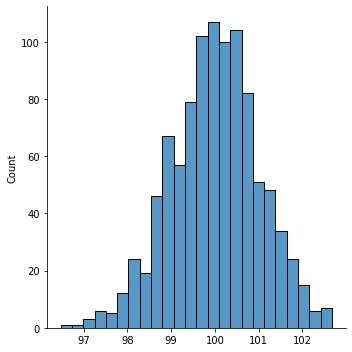

In [612]:
#generate normal distribution data
normaldistr = np.random.normal(loc=100,scale=1,size=(1000))
sns.displot(normaldistr)
plt.show()


In [613]:
#count the number of BE data in decending
normaldistr_num = len(normaldistr)
seed = [40,50,60,70,80,90,100,110,120,130]
count = 1000
errpec = 0.4

def countBEData(data=normaldistr,seed=seed,errpec=errpec):
    datalen = len(data)
    count = datalen
    tempt = 0.0
    for i in range(normaldistr_num):
        tempt = data[i]-data[i]*errpec
        for j in range(len(seed)):
            if round(tempt) == seed[j]:
                count -= 1
    return count

In [614]:
print("when err = 0.1, data size = ",countBEData(errpec=0.1))
print("when err = 0.2, data size = ",countBEData(errpec=0.2))
print("when err = 0.3, data size = ",countBEData(errpec=0.3))
print("when err = 0.4, data size = ",countBEData(errpec=0.4))

when err = 0.1, data size =  559
when err = 0.2, data size =  525
when err = 0.3, data size =  468
when err = 0.4, data size =  403


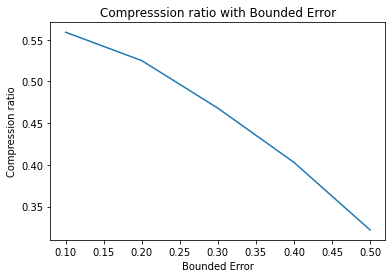

In [615]:
#compression ratio = BE data size / original data size
BE = [0.1,0.2,0.3,0.4,0.5]
countbedata = [countBEData(errpec=0.1)/1000,countBEData(errpec=0.2)/1000,countBEData(errpec=0.3)/1000,countBEData(errpec=0.4)/1000,countBEData(errpec=0.5)/1000]
#countbedata = [1000/countBEData(errpec=0.1),1000/countBEData(errpec=0.2),1000/countBEData(errpec=0.3),1000/countBEData(errpec=0.4),1000/countBEData(errpec=0.5)]
plt.title("Compresssion ratio with Bounded Error")
plt.xlabel("Bounded Error")
plt.ylabel("Compression ratio")
plt.plot(BE,countbedata)
plt.show()

make regression data
plot the fig of BE v.s accuracy &  compression v.s accuracy

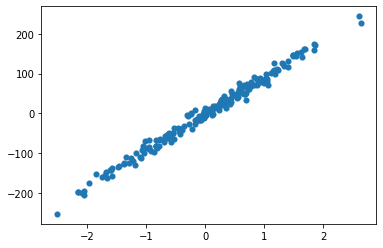

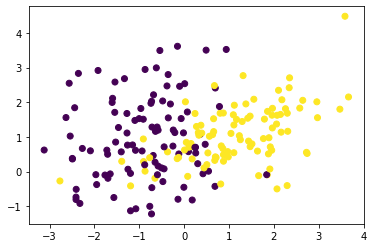

In [616]:
X,y = datasets.make_regression(n_samples=200,n_features=1,n_targets=1,noise=10)
plt.scatter(X,y,linewidths=0.1)
plt.show()

X1, Y1 = datasets.make_classification(n_samples=200,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,random_state=42)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1)


In [617]:
def plot_hyperplane(clf, X, y,h=0.02,draw_sv=True,title='hyperplane'):
    # create a mesh to plot in
    plt.figure(figsize=(10,6))
    X = np.mat(X)
    # print("X",X)
    # print("y",y)
 
    # 使用numpy的库函数找到最值,确定绘图范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
 
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    # print("Z", np.c_[xx.ravel(), yy.ravel()])
    
    # x,y扁平化,生成二维坐标并将预测值作为函数值
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # SVM的分割超平面
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # 绘制康拓图
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)
 
    markers = ['o', '*', '^']
    colors = ['r', 'b', 'c']
    # 去重
    labels = np.unique(y)
    # print("LABELS",y)
 
    # 对于每一个标签种类
    for label in labels:
        # 这是掩码索引
        label = int(label)
        plt.scatter(X[y == label][:, 0].tolist(),
                    X[y == label][:, 1].tolist(),
                    c=colors[label],
                    marker=markers[label])
    # 画出支持向量
    if draw_sv:
        sv = clf.support_vectors_
        print(sv)
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


[[ 0.35734448  1.07566374]
 [-0.14989682  3.61729861]
 [-0.35490992  1.55059358]
 [ 0.93710387  3.52558068]
 [-0.72131493 -0.46420127]
 [-0.11959689  0.50891314]
 [-0.44758139  0.71376284]
 [-0.76699391 -1.00254142]
 [ 0.17855096 -0.82020229]
 [ 0.68583542 -0.4261365 ]
 [ 0.07025051  1.72051478]
 [ 0.23890301  0.69843315]
 [-0.47553789 -0.28851949]
 [-0.58161457  1.19667242]
 [ 0.69302302  2.41232056]
 [ 0.25208052  0.70104307]
 [-0.13866279 -0.79793785]
 [-0.06789396  1.53020724]
 [-0.25130391  0.73608209]
 [-0.6910389   0.46491472]
 [ 0.25633049  0.53589965]
 [ 0.09529002  0.57526555]
 [-0.24392415  1.19979806]
 [-0.30809618  1.95043884]
 [ 0.46785542  0.7871928 ]
 [ 0.41873144 -0.06259904]
 [ 1.83871449 -0.0895209 ]
 [ 0.30162791  0.22791173]
 [-0.20876699  1.12654681]
 [-0.00745441 -0.45284256]
 [ 0.01094378  2.53762706]
 [-0.50660604  0.10678033]
 [-0.58215572  0.16041392]
 [-0.72886112 -1.22199822]
 [-0.01661337  1.1175537 ]
 [ 0.71099872  0.40604731]
 [ 0.10497061  0.70366436]
 

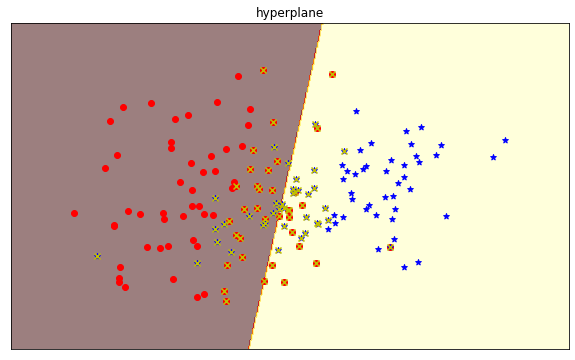

In [618]:
X_train, X_test,y_train, y_test = train_test_split(X1, Y1, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto',probability=True)
clf_original.fit(X_train, y_train)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
plot_hyperplane(clf_original,X_train,y_train)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.show()


In [619]:
mean = np.average(X1,axis=0)
print(mean)

[0.12729097 0.99804798]


In [620]:
#make BE data
def makeBEdata(X=X1,err=0.1):
    mean = np.mean(X1,axis=0)
    tempt = X.copy()
    for i in range(len(X)):
        for j in range(2):
            rand = np.random.randint(low=0,high=2)
            if j :
                if rand:
                    tempt[i][j] += err*mean[0]
                else:
                    tempt[i][j] -= err*mean[0]
            else : 
                if rand:
                    tempt[i][j] += err*mean[1]
                else:
                    tempt[i][j] -= err*mean[1]
           
    return tempt
           


In [621]:
X1BE = makeBEdata(X1,0.1)
X2BE = makeBEdata(X1,0.2)
X3BE = makeBEdata(X1,0.3)
X4BE = makeBEdata(X1,0.4)
X5BE = makeBEdata(X1,0.5)

In [622]:
X1

array([[-0.87292898,  0.013042  ],
       [ 1.31293463,  2.77053357],
       [ 2.34042818,  2.42099601],
       [ 2.29454774, -0.40438019],
       [ 0.94410516,  0.4772409 ],
       [-0.11959689,  0.50891314],
       [ 0.1510847 ,  0.81007677],
       [-0.00745441, -0.45284256],
       [-1.25396925,  0.06769236],
       [-0.24392415,  1.19979806],
       [-1.9208928 ,  2.9189499 ],
       [ 0.48806269,  3.50578584],
       [ 2.25751204,  1.81515089],
       [-3.12190908,  0.62220145],
       [ 1.87768113,  0.51095984],
       [ 0.46785542,  0.7871928 ],
       [ 0.48404809,  0.04843842],
       [-0.54235518,  3.49536942],
       [ 1.04235818,  1.10204918],
       [ 1.63367133,  0.59219328],
       [ 1.85756778,  1.7382647 ],
       [-2.41167954, -0.80620914],
       [ 0.87481918,  0.48815664],
       [ 0.09529002,  0.57526555],
       [-1.64994223, -0.06695917],
       [-0.65245349, -0.19158949],
       [ 2.10252081,  2.34684404],
       [ 2.9574463 ,  2.01418031],
       [-1.70056309,

In [623]:
def ACC_plot(X=X1BE,Y=Y1):
    X_train, X_test,y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
    clf_X1BE = SVC(kernel='linear',C=1,gamma='auto',probability=True)
    clf_X1BE.fit(X_train, y_train)
    result_X1BE_train = clf_X1BE.score(X_train, y_train)
    result_X1BE_test = clf_X1BE.score(X_test, y_test)
    plot_hyperplane(clf_X1BE,X_train,y_train)
    print(' Accuracy (on training) = '+str(result_X1BE_train))
    print(' Accuracy (on testing) = '+str(result_X1BE_test))
    plt.show()
    return result_X1BE_train,result_X1BE_test

[[ 0.45714928  1.08839284]
 [-0.45471471  1.53786448]
 [ 0.83729907  3.53830977]
 [-0.82111973 -0.45147217]
 [-0.01979209  0.52164223]
 [-0.54738619  0.72649193]
 [-0.86679871 -0.98981233]
 [ 0.07874616 -0.8074732 ]
 [ 0.58603062 -0.4388656 ]
 [ 0.17005531  1.73324388]
 [ 0.33870781  0.71116224]
 [-0.37573309 -0.2757904 ]
 [-0.48180977  1.18394332]
 [ 0.59321822  2.42504966]
 [ 0.35188531  0.68831398]
 [-0.28399623  2.48505322]
 [-0.23846759 -0.78520876]
 [ 0.03191084  1.54293633]
 [-0.15149911  0.74881119]
 [ 0.15652569  0.52317056]
 [-0.00451478  0.56253645]
 [-0.14411935  1.21252715]
 [-0.40790098  1.93770975]
 [ 0.36805062  0.7744637 ]
 [ 0.31892664 -0.04986995]
 [ 1.73890969 -0.07679181]
 [ 0.40143271  0.21518264]
 [-0.30857179  1.13927591]
 [ 0.09235039 -0.44011347]
 [-0.08886102  2.52489796]
 [-0.40680124  0.09405124]
 [-0.25833671  2.81351533]
 [-0.48235092  0.14768483]
 [-0.82866592 -1.23472731]
 [ 0.08319143  1.10482461]
 [ 0.81080351  0.39331821]
 [ 0.00516581  0.69093526]
 

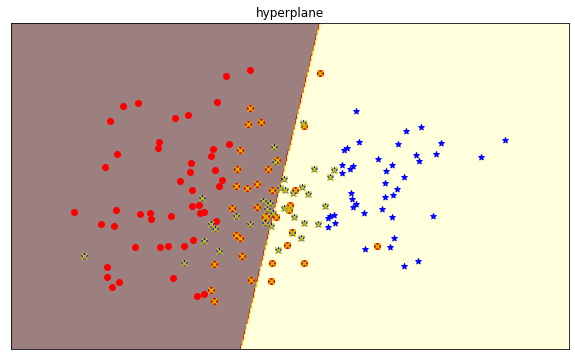

[[ 0.55695407  1.05020555]
 [ 0.04971277  3.59184041]
 [-0.15530032  1.57605177]
 [ 1.13671346  3.55103887]
 [-0.52170533 -0.48965946]
 [-0.31920648  0.48345494]
 [-0.56738432 -1.02799962]
 [-0.02105863 -0.7947441 ]
 [ 0.88544501 -0.45159469]
 [-0.12935908  1.74597298]
 [ 0.43851261  0.72389134]
 [-0.67514749 -0.31397769]
 [-0.38200497  1.22213061]
 [ 0.89263262  2.43777875]
 [ 0.45169011  0.72650127]
 [-0.18419143  2.44686593]
 [-0.44100939  1.13560218]
 [-0.33827239 -0.82339605]
 [-0.26750356  1.55566543]
 [-0.05169431  0.76154028]
 [ 0.45594008  0.51044146]
 [-0.10431958  0.54980735]
 [-0.44353374  1.17433986]
 [-0.10848658  1.92498065]
 [ 0.66746501  0.81265099]
 [ 0.21912184 -0.08805724]
 [ 1.63910489 -0.06406271]
 [ 0.50123751  0.20245354]
 [-0.40837659  1.10108862]
 [ 0.19215519 -0.47830076]
 [-0.18866582  2.56308525]
 [-0.30699644  0.08132214]
 [-0.78176532  0.13495573]
 [-0.92847072 -1.24745641]
 [-0.21622297  1.09209551]
 [-0.09463899  0.72912255]
 [-0.99591454 -0.38706468]
 

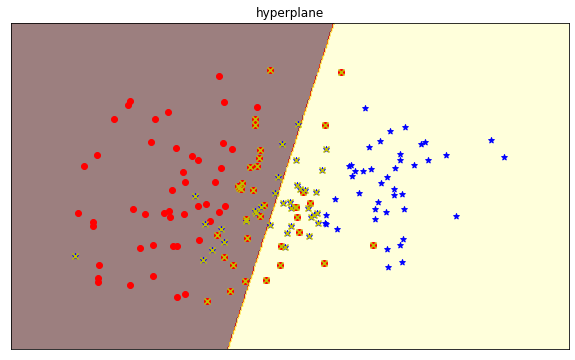

[[ 5.79300821e-02  1.11385103e+00]
 [-5.54955202e-02  1.58878087e+00]
 [ 6.37689472e-01  3.48739339e+00]
 [-6.39356636e-01  6.33380589e-01]
 [-4.21900534e-01 -5.02388558e-01]
 [-2.42940788e-01  3.45718213e+00]
 [ 1.79817509e-01  4.70725845e-01]
 [-1.06640831e+00 -9.64354133e-01]
 [ 4.77965358e-01 -7.82015003e-01]
 [ 3.86421023e-01 -3.87949208e-01]
 [ 3.69664910e-01  1.75870207e+00]
 [-6.05113815e-02  7.36620436e-01]
 [-7.74952287e-01 -2.50332202e-01]
 [-2.82200173e-01  1.23485971e+00]
 [ 3.93608625e-01  2.45050785e+00]
 [-4.73338788e-02  7.39230363e-01]
 [ 1.60751604e-01 -8.36125144e-01]
 [ 2.31520437e-01  1.49201995e+00]
 [ 4.81104864e-02  7.74269380e-01]
 [ 5.55744882e-01  5.74086944e-01]
 [-2.04124375e-01  5.37078255e-01]
 [-5.43338542e-01  1.23798535e+00]
 [-7.78764652e-01 -1.11204693e+00]
 [ 1.68441023e-01  8.25380089e-01]
 [ 7.18145832e-01 -1.00786333e-01]
 [ 1.53930009e+00 -5.13336144e-02]
 [ 2.21351611e-03  1.89724443e-01]
 [ 9.06474053e-02  1.16473410e+00]
 [ 2.91959988e-01 -4

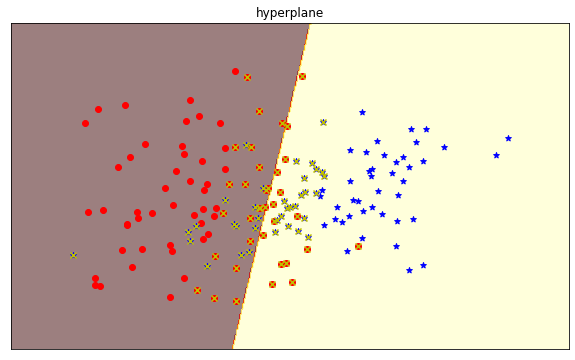

[[-0.04187472  1.12658013]
 [ 0.53788467  3.57649706]
 [-0.32209574 -0.41328488]
 [ 0.27962231  0.55982952]
 [-0.36777472 -1.05345781]
 [-0.22066823 -0.87111868]
 [ 0.28661622 -0.47705289]
 [-0.5672872   1.7705376 ]
 [ 0.46946971  1.6695984 ]
 [ 0.63812221  0.74934953]
 [-0.87475709 -0.33943588]
 [-0.18239537  1.14575603]
 [ 1.09224221  2.46323695]
 [-0.14713868  0.75195946]
 [ 0.01541817  2.52324051]
 [-0.2413998   1.11014399]
 [ 0.2605564  -0.74702147]
 [ 0.33132524  1.58112362]
 [ 0.14791528  0.6851657 ]
 [-0.2918197   0.41399834]
 [-0.14288871  0.58681604]
 [ 0.49450921  0.52434916]
 [-0.64314334  1.25071445]
 [-0.67895985 -1.02294325]
 [ 0.86707461  0.73627641]
 [ 0.01951224 -0.11351543]
 [ 1.43949529 -0.03860452]
 [ 0.7008471   0.17699535]
 [ 0.1904522   1.1774632 ]
 [ 0.39176479 -0.40192618]
 [-0.34209523  1.92003517]
 [-0.38827542  2.48671067]
 [ 0.04107769  2.85170262]
 [-0.18293653  0.21133031]
 [-0.32964193 -1.17108183]
 [ 0.38260582  1.16847009]
 [-0.08073278  1.98799436]
 

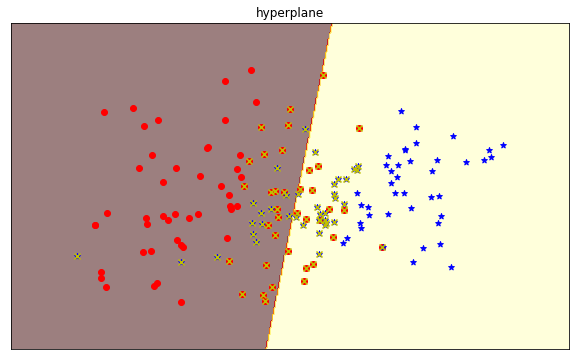

[[-0.14167951  1.01201826]
 [ 0.34912717  3.55365312]
 [ 0.14411408  1.48694809]
 [ 1.43612786  3.58922616]
 [-0.43974704  0.53154781]
 [-0.04333119  3.43172394]
 [-0.61862088  0.44526765]
 [-0.26796992 -0.93889594]
 [ 0.67757495 -0.75655681]
 [ 1.18485941 -0.36249101]
 [-0.58679848  0.67835277]
 [-0.69765357 -1.06803561]
 [ 0.56927451  1.78416027]
 [-0.60033951  1.54055673]
 [ 0.73792701  0.63478766]
 [-0.97456188 -0.35216498]
 [-0.08259058  1.13302694]
 [ 0.19399903  2.47596604]
 [-0.10501958  1.22252821]
 [-1.06894905 -0.81235529]
 [ 0.75110451  0.76468856]
 [ 0.11522296  2.53596961]
 [-0.63768678 -0.86158334]
 [-0.56691795  1.59385272]
 [ 0.24772008  0.67243661]
 [ 0.75535448  0.59954514]
 [ 0.59431401  0.51162006]
 [ 0.25509984  1.26344354]
 [ 0.19092781  1.88679336]
 [-0.57915506 -1.13750512]
 [-0.03116857  0.85083828]
 [ 0.91775543 -0.12624453]
 [ 1.3396905  -0.15316639]
 [-0.19739608  0.16426625]
 [-0.75494526  0.00404688]
 [-0.70779098  1.1901923 ]
 [-0.5064784  -0.51648805]
 

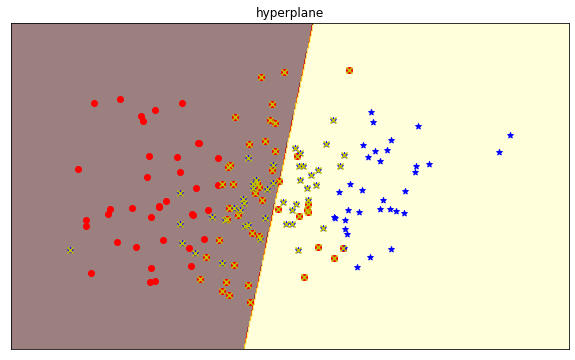

In [624]:
BEAcclist = []
BEAcclist.append(ACC_plot())
BEAcclist.append(ACC_plot(X=X2BE))
BEAcclist.append(ACC_plot(X=X3BE))
BEAcclist.append(ACC_plot(X=X4BE))
BEAcclist.append(ACC_plot(X=X5BE))

In [625]:
print(BEAcclist)
l = [0.9875,0.98125,0.975,0.95,0.925]

[(0.8125, 0.9), (0.825, 0.925), (0.8125, 0.875), (0.80625, 0.9), (0.7875, 0.875)]


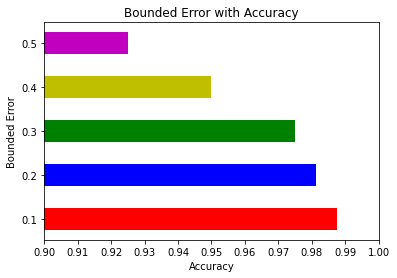

In [626]:
from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(0.01)
#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(10)
#把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
#把x轴的主刻度设置为1的倍数
#ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(0.9,1.0)
#把x轴的刻度范围设置为-0.5到11，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
#plt.ylim(-5,110)
#把y轴的刻度范围设置为-5到110，同理，-5不会标出来，但是能看到一点空白
plt.title("Bounded Error with Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['r','b','g','y','m']
plt.barh(np.arange(len(BE)),l,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(BE)), BE)
plt.show()


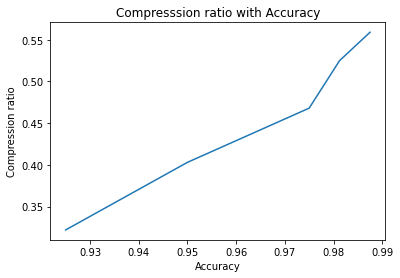

In [627]:
plt.title("Compresssion ratio with Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Compression ratio")
plt.plot(l,countbedata)
plt.show()

make image of BE vs Acc; x1 BE distribution vs Acc;x2 BE distribution vs Acc under 4 different ML algo
dataset comes from iris dataset

In [628]:
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

df_iris_original = pd.DataFrame(iris_x)
df_iris_2feature = df_iris_original.iloc[: , :-2]
df_iris_2feature[2]  = iris_y
print(df_iris_2feature,df_iris_2feature[2].value_counts())

df_iris_2feature.columns = ['x1','x2','y']
df_iris_2feature.loc[df_iris_2feature.y==2,'y']=1
print(df_iris_2feature['y'].value_counts(),df_iris_2feature)

iris_subset = df_iris_2feature.sample(frac=0.2,replace=False,random_state=43)
df_iris_2feature = df_iris_2feature.append(iris_subset)
print(df_iris_2feature.info())
df_iris_2feature = df_iris_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_iris_2feature.info(),iris_subset.info())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64
1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 4.9 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column 

In [629]:
def makeBEdata_4direc(X=df_iris_2feature,BE=0.1,importance = [0.5,0.5]):
    #pd.set_option('display.max_rows',10)
    temp = X.copy()
    df_iris_2feature_be = pd.DataFrame.to_numpy(temp)
    e1 = temp['x1'].mean()*BE*importance[0]
    e2 = temp['x2'].mean()*BE*importance[1]

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] += e1
    temp = temp.to_numpy()
    df_iris_2feature_be = np.vstack((df_iris_2feature_be,temp))
    temp = X.copy()

    for idx,cell in temp['x1'].iteritems():
        temp['x1'][idx] = temp['x1'][idx] - e1
    temp = temp.to_numpy()
    df_iris_2feature_be = np.vstack((df_iris_2feature_be,temp))
    temp = X.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] += e2
    temp = temp.to_numpy()
    df_iris_2feature_be = np.vstack((df_iris_2feature_be,temp))
    temp = X.copy()

    for idx,cell in temp['x2'].iteritems():
        temp['x2'][idx] = temp['x2'][idx] - e2
    temp = temp.to_numpy()
    df_iris_2feature_be = np.vstack((df_iris_2feature_be,temp))
    temp = X.copy()

    df_iris_2feature_be = pd.DataFrame(df_iris_2feature_be)
    return df_iris_2feature_be




BESVM Accuracy (on training) = with bounded error 0.1 : 0.9788732394366197
BESVM Accuracy (on testing) = with bounded erro 0.1 : 1.0
BESVM Accuracy (on training) = with bounded error 0.2 : 0.9295774647887324
BESVM Accuracy (on testing) = with bounded erro 0.2 : 0.9577464788732394
BESVM Accuracy (on training) = with bounded error 0.3 : 0.8661971830985915
BESVM Accuracy (on testing) = with bounded erro 0.3 : 0.8450704225352113
BESVM Accuracy (on training) = with bounded error 0.4 : 0.8380281690140845
BESVM Accuracy (on testing) = with bounded erro 0.4 : 0.8309859154929577
BESVM Accuracy (on training) = with bounded error 0.5 : 0.8169014084507042
BESVM Accuracy (on testing) = with bounded erro 0.5 : 0.7887323943661971


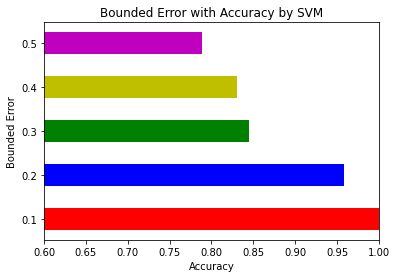

In [630]:
#BESVM 0.1~0.5
BEAcclist_svm = []

for i in BE :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

   
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    BEAcclist_svm.append(result_BE_test)
    print('BESVM Accuracy (on training) = with bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with bounded erro '+str(i)+' : '+str(result_BE_test))

x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.6,1.0)
plt.title("Bounded Error with Accuracy by SVM")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['r','b','g','y','m']
plt.barh(np.arange(len(BE)),BEAcclist_svm,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(BE)), BE)
plt.show()


BEKNN Accuracy (on training) = with bounded error 0.1 : 0.9823943661971831
BEKNN Accuracy (on testing) = with bounded erro 0.1 : 0.9859154929577465
BEKNN Accuracy (on training) = with bounded error 0.2 : 0.9330985915492958
BEKNN Accuracy (on testing) = with bounded erro 0.2 : 0.9295774647887324
BEKNN Accuracy (on training) = with bounded error 0.3 : 0.897887323943662
BEKNN Accuracy (on testing) = with bounded erro 0.3 : 0.8450704225352113
BEKNN Accuracy (on training) = with bounded error 0.4 : 0.8697183098591549
BEKNN Accuracy (on testing) = with bounded erro 0.4 : 0.7605633802816901
BEKNN Accuracy (on training) = with bounded error 0.5 : 0.8838028169014085
BEKNN Accuracy (on testing) = with bounded erro 0.5 : 0.8028169014084507


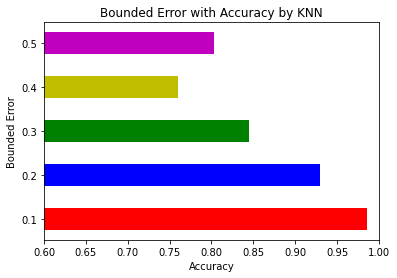

In [631]:
#BEKNN 0.1~0.5
from sklearn.neighbors import KNeighborsClassifier
BEAcclist_knn = []

for i in BE :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    KNN_BE = KNeighborsClassifier()
    KNN_BE.fit(X_train, y_train)
    y_BE_knn_predict = KNN_BE.predict(X_test)
    result_BE_train = KNN_BE.score(X_train, y_train)
    result_BE_test = KNN_BE.score(X_test, y_test)
    BEAcclist_knn.append(result_BE_test)
    print('BEKNN Accuracy (on training) = with bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with bounded erro '+str(i)+' : '+str(result_BE_test))

x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.6,1.0)
plt.title("Bounded Error with Accuracy by KNN")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['r','b','g','y','m']
plt.barh(np.arange(len(BE)),BEAcclist_knn,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(BE)), BE)
plt.show()



BEKM Accuracy (on training) = with bounded error 0.1 : 0.7323943661971831
BEKM Accuracy (on testing) = with bounded erro 0.1 : 0.9859154929577465
BEKM Accuracy (on training) = with bounded error 0.2 : 0.7147887323943662
BEKM Accuracy (on testing) = with bounded erro 0.2 : 0.9859154929577465
BEKM Accuracy (on training) = with bounded error 0.3 : 0.6901408450704225
BEKM Accuracy (on testing) = with bounded erro 0.3 : 0.9859154929577465
BEKM Accuracy (on training) = with bounded error 0.4 : 0.6795774647887324
BEKM Accuracy (on testing) = with bounded erro 0.4 : 0.9859154929577465
BEKM Accuracy (on training) = with bounded error 0.5 : 0.6549295774647887
BEKM Accuracy (on testing) = with bounded erro 0.5 : 0.9859154929577465


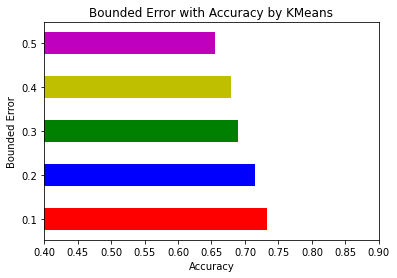

In [632]:
#BEKMeans 0.1~0.5
from sklearn.cluster import KMeans
BEAcclist_km = []

for i in BE :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    KM_BE = KMeans(n_clusters=2,init='random',random_state=5)
    KM_BE.fit(X_train)
    y_BE_KM_predict = KM_BE.predict(X_train)
    y_BE_KM_predict_test = KM_BE.predict(X_test)
    result_BE_train = 1 - np.sum(y_BE_KM_predict!=y_train)/len(y_train)
    result_BE_test = 1 - np.sum(y_BE_KM_predict_test!=y_train)/len(y_test)
    BEAcclist_km.append(result_BE_train)
    print('BEKM Accuracy (on training) = with bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKM Accuracy (on testing) = with bounded erro '+str(i)+' : '+str(result_BE_test))

x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.4,0.9)
plt.title("Bounded Error with Accuracy by KMeans")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['r','b','g','y','m']
plt.barh(np.arange(len(BE)),BEAcclist_km,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(BE)), BE)
plt.show()



err distribution(alpha,1-alpha) vs accuracy

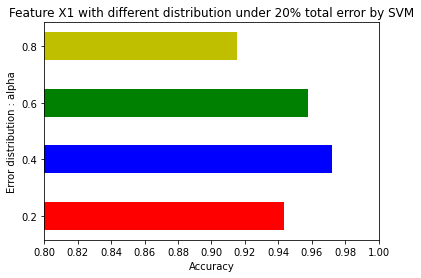

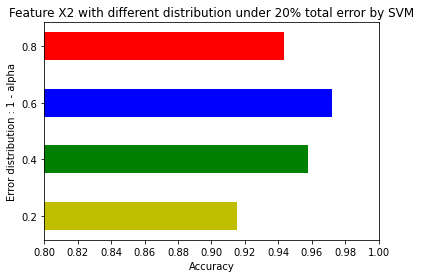

In [633]:
#data from excel,total err=0.2,alpha=[0.2,0.4,0.6,0.8,1.0],svm
alpha = [0.2,0.4,0.6,0.8]
answer_alpha = [0.9436,0.9718,0.9577,0.9154]
answer_alphaReverse = [0.9154,0.9577,0.9718,0.9436]
x_major_locator=MultipleLocator(0.02)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.8,1.0)
plt.title("Feature X1 with different distribution under 20% total error by SVM")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : alpha")
color = ['r','b','g','y']
plt.barh(np.arange(len(alpha)),answer_alpha,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)

plt.savefig('D:\BESVM\BESVM\experimentpng\error_alpha_svm.png')
plt.show()


x_major_locator=MultipleLocator(0.02)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.8,1.0)
plt.title("Feature X2 with different distribution under 20% total error by SVM")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : 1 - alpha")
color = ['y','g','b','r']
plt.barh(np.arange(len(alpha)),answer_alphaReverse,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)

plt.savefig('D:\BESVM\BESVM\experimentpng\error_alphaReverse_svm.png')
plt.show()




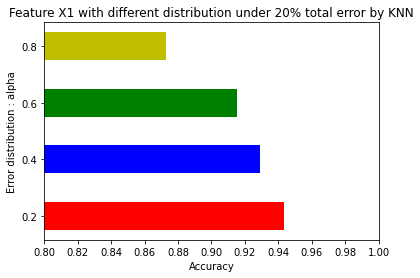

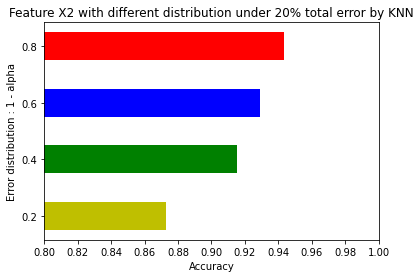

In [634]:
#data from excel,total err=0.2,alpha=[0.2,0.4,0.6,0.8,1.0],knn
alpha = [0.2,0.4,0.6,0.8]
answer_alpha = [0.9436,0.929,0.915,0.873]
answer_alphaReverse = [0.873,0.915,0.929,0.9436]
x_major_locator=MultipleLocator(0.02)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.8,1.0)
plt.title("Feature X1 with different distribution under 20% total error by KNN")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : alpha")
color = ['r','b','g','y']
plt.barh(np.arange(len(alpha)),answer_alpha,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)
plt.savefig('D:\BESVM\BESVM\experimentpng\error_alpha_knn.png')
plt.show()

x_major_locator=MultipleLocator(0.02)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.8,1.0)
plt.title("Feature X2 with different distribution under 20% total error by KNN")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : 1 - alpha")
color = ['y','g','b','r']
plt.barh(np.arange(len(alpha)),answer_alphaReverse,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)
plt.savefig('D:\BESVM\BESVM\experimentpng\error_alphaReversed_knn.png')
plt.show()


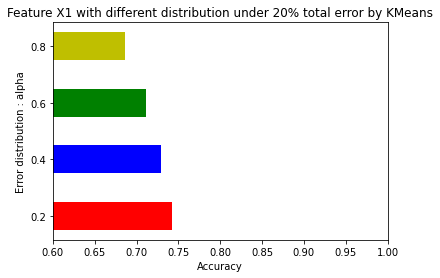

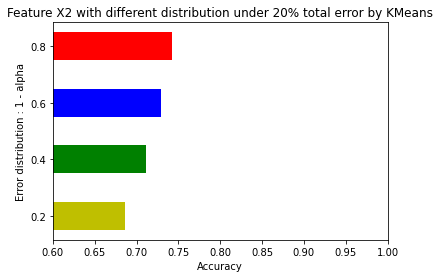

In [635]:
#data from excel,total err=0.2,alpha=[0.2,0.4,0.6,0.8,1.0],kmeans
alpha = [0.2,0.4,0.6,0.8]
answer_alpha = [0.7429,0.7288,0.7112,0.6866]
answer_alphaReverse = [0.6866,0.7112,0.7288,0.7429]
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.6,1.0)
plt.title("Feature X1 with different distribution under 20% total error by KMeans")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : alpha")
color = ['r','b','g','y']
plt.barh(np.arange(len(alpha)),answer_alpha,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)
plt.savefig('D:\BESVM\BESVM\experimentpng\error_alpha_kmeans.png')
plt.show()

x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.6,1.0)
plt.title("Feature X2 with different distribution under 20% total error by KMeans")
plt.xlabel("Accuracy")
plt.ylabel("Error distribution : 1 - alpha")
color = ['y','g','b','r']
plt.barh(np.arange(len(alpha)),answer_alphaReverse,color=color,height=0.5)  # 改成 barh
plt.yticks(np.arange(len(alpha)), alpha)
plt.savefig('D:\BESVM\BESVM\experimentpng\error_alphaReversed_kmeans.png')
plt.show()


BERLEFI png

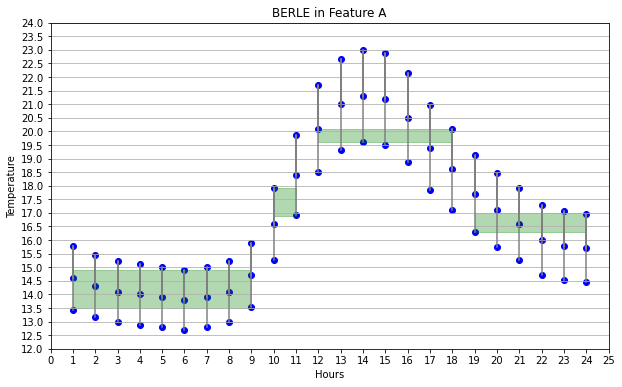

In [636]:
# make BELRE sample data and fig
# feature A
from itertools import chain
x = [[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5],[6,6,6],[7,7,7],[8,8,8],[9,9,9],
[10,10,10],[11,11,11],[12,12,12],[13,13,13],[14,14,14],[15,15,15],[16,16,16],
[17,17,17],[18,18,18],[19,19,19],[20,20,20],[21,21,21],[22,22,22],[23,23,23],[24,24,24]]

y = [[14.6,15.768,13.432],[14.3,15.444,13.156],[14.1,15.228,12.972],[14,15.12,12.88],[13.9,15.012,12.788],[13.8,14.904,12.696]
,[13.9,15.012,12.788],[14.1,15.228,12.972],[14.7,15.876,13.524],[16.6,17.928,15.272],[18.4,19.872,16.928],[20.1,21.708,18.492],
[21,22.68,19.32],[21.3,23.004,19.596],[21.2,22.896,19.504],[20.5,22.14,18.86],[19.4,20.952,17.848],[18.6,20.088,17.112],
[17.7,19.116,16.284],[17.1,18.468,15.732],[16.6,17.928,15.272],[16,17.28,14.72],[15.8,17.064,14.536],[15.7,16.956,14.444]]

fig = plt.figure(figsize=(10,6))
for i in range(len(x)):
 plt.plot(x[i], y[i], color='gray')
 plt.scatter(x[i], y[i], color='b')

x = list(chain.from_iterable(x))

plt.fill_between(x[0:26],13.5,14.9,color='g',alpha=0.3)
plt.fill_between(x[27:32],16.9,17.9,color='g',alpha=0.3)
plt.fill_between(x[33:54],19.6,20.1,color='g',alpha=0.3)
plt.fill_between(x[55:72],16.3,17.0,color='g',alpha=0.3)

x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(0.5)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,25)
plt.ylim(12,24)
plt.grid(axis='y')
plt.title("BERLE in Feature A")
plt.xlabel("Hours")
plt.ylabel("Temperature")
plt.savefig('D:\BESVM\BESVM\experimentpng\BERLE_Feature_A.png')
plt.show()


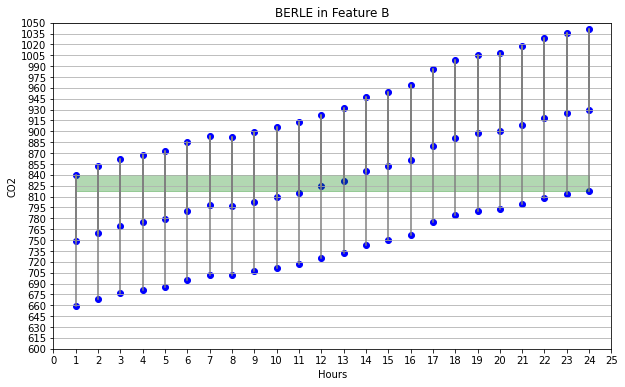

In [637]:
# make BELRE sample data and fig
# feature B
from itertools import chain
x = [[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5],[6,6,6],[7,7,7],[8,8,8],[9,9,9],
[10,10,10],[11,11,11],[12,12,12],[13,13,13],[14,14,14],[15,15,15],[16,16,16],
[17,17,17],[18,18,18],[19,19,19],[20,20,20],[21,21,21],[22,22,22],[23,23,23],[24,24,24]]

y = [[749.2,839.104,659.296],[760.4,851.648,669.152],[769.6666667,862.0266667,677.3066667],[774.75,867.72,681.78],[779,872.48,685.52],[790,884.8,695.2]
,[798,893.76,702.24],[797,892.64,701.36],[803.2,899.584,706.816],[809,906.08,711.92],[815.25,913.08,717.42],[824,922.88,725.12],
[832,931.84,732.16],[845.3333333,946.7733333,743.8933333],[852.4,954.688,750.112],[861,964.32,757.68],[880,985.6,774.4],[891,997.92,784.08],[897.6,1005.312,789.888],
[900.5,1008.56,792.44],[908.8,1017.856,799.744],[918,1028.16,807.84],[925.2,1036.224,814.176],[929.4,1040.928,817.872]]

fig = plt.figure(figsize=(10,6))
for i in range(len(x)):
 plt.plot(x[i], y[i], color='gray')
 plt.scatter(x[i], y[i], color='b')

x = list(chain.from_iterable(x))

plt.fill_between(x[0:72],817.872,839.104,color='g',alpha=0.3)
#plt.fill_between(x[27:32],16.9,17.9,color='g',alpha=0.3)
#plt.fill_between(x[33:54],19.6,20.1,color='g',alpha=0.3)
#plt.fill_between(x[55:72],16.3,17.0,color='g',alpha=0.3)

x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(15)
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(0,25)
plt.ylim(600,1050)
plt.grid(axis='y')
plt.title("BERLE in Feature B")
plt.xlabel("Hours")
plt.ylabel("CO2")
plt.savefig('D:\BESVM\BESVM\experimentpng\BERLE_Feature_B.png')
plt.show()


,x1,x2,y
0,14.6,749.200000,1
1,14.3,760.400000,1
2,14.1,769.666667,1
3,14.0,774.750000,1
4,13.9,779.000000,1
...,...,...,...
115,17.1,883.741083,0
116,16.6,892.041083,0
117,16.0,901.241083,0
118,15.8,908.441083,0


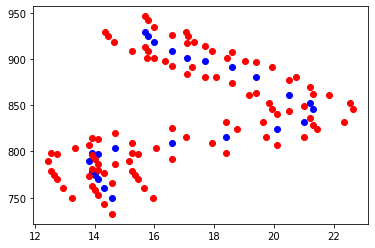

In [638]:
dataBEHC = pd.read_csv("CO2Temp_ForBEHC.csv",names=['x'+str(i) for i in range(1,3)]+['y'],sep=",")
dataBEHC['y'] = 1

e1 = dataBEHC['x1'].mean()*0.08
e2 = dataBEHC['x2'].mean()*0.02
temp = dataBEHC.copy()
dataBEHC_be = pd.DataFrame.to_numpy(dataBEHC)
for idx,cell in dataBEHC['x1'].iteritems():
    temp['x1'][idx] += e1
    temp['y'][idx] = 0
temp = temp.to_numpy()
dataBEHC_be = np.vstack((dataBEHC_be,temp))

temp = dataBEHC.copy()
for idx,cell in dataBEHC['x1'].iteritems():
    temp['x1'][idx] -= e1
    temp['y'][idx] = 0
temp = temp.to_numpy()
dataBEHC_be = np.vstack((dataBEHC_be,temp))

temp = dataBEHC.copy()
for idx,cell in dataBEHC['x2'].iteritems():
    temp['x2'][idx] += e2
    temp['y'][idx] = 0
temp = temp.to_numpy()
dataBEHC_be = np.vstack((dataBEHC_be,temp))

temp = dataBEHC.copy()
for idx,cell in dataBEHC['x2'].iteritems():
    temp['x2'][idx] -= e2
    temp['y'][idx] = 0
temp = temp.to_numpy()
dataBEHC_be = np.vstack((dataBEHC_be,temp))
dataBEHC_be = pd.DataFrame(dataBEHC_be)
dataBEHC_be.columns = ['x1','x2','y']
dataBEHC_be['y'] = dataBEHC_be['y'].apply(lambda x : int(x))

tx = dataBEHC_be.iloc[:,:-1].values
ty = dataBEHC_be.iloc[:,-1].values

#plt.scatter(dataBEHC.iloc[:,:1],dataBEHC.iloc[:,1:2],color='b')
#plt.scatter(dataBEHC_be[dataBEHC_be.loc['y']==1,0],dataBEHC_be[dataBEHC_be.loc['y']==1,1],color='r')
plt.scatter(tx[ty==1,0],tx[ty==1,1],color = 'b')
plt.scatter(tx[ty==0,0],tx[ty==0,1],color = 'r')
plt.plot()
dataBEHC_be


In [563]:
# ratio from MLMODELS_FeatureImportance.ipynb
#RegCoef : [0.35827710780890565, -0.5599048746192522]
importanceReg = [0.39020272088266406, 0.6097972791173359]
#PermuCoef : [0.3183098591549295, 0.12676056338028163]
importancePermu = [0.7151898734177216, 0.28481012658227844]
#DTreeCoef : [0.6685728498062127, 0.33142715019378727]
importanceDTree = [0.6685728498062127, 0.33142715019378727]

In [666]:
#ch4 generate accuracy of applying FI in data with 2% - 14% err
#svm,iris,importanceReg,Permu,DTree

BEn = [0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_svm_importanceReg = []
BEAcclist_svm_importancePermu = []
BEAcclist_svm_importanceDTree = []
BEAcclist_svm = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    BEAcclist_svm_importanceReg.append(result_BE_test)
    print('BESVM Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test))

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    BEAcclist_svm_importancePermu.append(result_BE_test)
    print('BESVM Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with  importancePermu bounded error '+str(i)+' : '+str(result_BE_test))

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    BEAcclist_svm_importanceDTree.append(result_BE_train)
    print('BESVM Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with  importanceDTree bounded error '+str(i)+' : '+str(result_BE_test))

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)#0.5:0.5
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEAcclist_svm.append(result_BE_train/31)
    print('BESVM Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BESVM Accuracy (on testing) = with  1:1 bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0



BESVM Accuracy (on training) = with importanceReg bounded error 0.02 : 0.9929577464788732
BESVM Accuracy (on testing) = with importanceReg bounded error 0.02 : 1.0
BESVM Accuracy (on training) = with importanceReg bounded error 0.04 : 0.9859154929577465
BESVM Accuracy (on testing) = with importanceReg bounded error 0.04 : 1.0
BESVM Accuracy (on training) = with importanceReg bounded error 0.06 : 0.9788732394366197
BESVM Accuracy (on testing) = with importanceReg bounded error 0.06 : 1.0
BESVM Accuracy (on training) = with importanceReg bounded error 0.08 : 0.971830985915493
BESVM Accuracy (on testing) = with importanceReg bounded error 0.08 : 1.0
BESVM Accuracy (on training) = with importanceReg bounded error 0.1 : 0.9683098591549296
BESVM Accuracy (on testing) = with importanceReg bounded error 0.1 : 0.9859154929577465
BESVM Accuracy (on training) = with importanceReg bounded error 0.12 : 0.9507042253521126
BESVM Accuracy (on testing) = with importanceReg bounded error 0.12 : 0.985915

In [667]:
print(BEAcclist_svm_importanceReg)
print(BEAcclist_svm_importancePermu)
print(BEAcclist_svm_importanceDTree)
print(BEAcclist_svm)

[1.0, 1.0, 1.0, 1.0, 0.9859154929577465, 0.9859154929577465, 0.971830985915493]
[0.9859154929577465, 1.0, 0.971830985915493, 1.0, 0.9859154929577465, 0.9577464788732394, 0.971830985915493]
[0.9964788732394366, 0.9894366197183099, 0.9823943661971831, 0.9788732394366197, 0.971830985915493, 0.9683098591549296, 0.9401408450704225]
[0.9903452975920033, 0.9599045888232617, 0.9586551567469328, 0.954679691049523, 0.9493412085415723, 0.9438891412994092, 0.935029532030895]


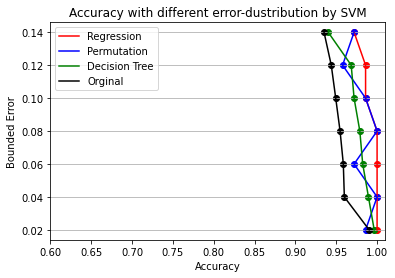

In [676]:
# x = [[0.9859154929577465, 1.0, 0.9436619718309859, 0.8873239436619719, 0.7887323943661971],
#      [0.9859154929577465, 0.9859154929577465, 0.9436619718309859, 0.8450704225352113, 0.8309859154929577],
#      [0.9859154929577465, 0.9647887323943662, 0.9154929577464789, 0.8802816901408451, 0.8485915492957746],
#      [1.0, 0.9577464788732394, 0.8450704225352113, 0.8309859154929577, 0.7887323943661971]]
x = [BEAcclist_svm_importanceReg,BEAcclist_svm_importancePermu,BEAcclist_svm_importanceDTree,BEAcclist_svm]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]

plt.xlim(0.6,1.01)
plt.title("Accuracy with different error-dustribution by SVM")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])
plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_SVM_iris.png')
plt.show()

In [707]:
#ch4 generate accuracy of applying FI in data with 0% - 40% err
#knn,iris,importanceReg,Permu,DTree
BEn = [0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_KNN_importanceReg = []
BEAcclist_KNN_importancePermu = []
BEAcclist_KNN_importanceDTree = []
BEAcclist_knn = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    KNN_BE = KNeighborsClassifier()
    KNN_BE.fit(X_train, y_train)
    y_BE_predict = KNN_BE.predict(X_test)
    result_BE_train = KNN_BE.score(X_train, y_train)
    result_BE_test = KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importanceReg.append(result_BE_test)
    print('BEKNN Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test))

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importancePermu.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKNN Accuracy (on testing) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importanceDTree.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKNN Accuracy (on testing) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)#1:1
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_knn.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKNN Accuracy (on testing) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0


BEKNN Accuracy (on training) = with importanceReg bounded error 0.02 : 1.0
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.02 : 1.0
BEKNN Accuracy (on training) = with importanceReg bounded error 0.04 : 1.0
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.04 : 1.0
BEKNN Accuracy (on training) = with importanceReg bounded error 0.06 : 0.9823943661971831
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.06 : 0.9859154929577465
BEKNN Accuracy (on training) = with importanceReg bounded error 0.08 : 0.9753521126760564
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.08 : 0.9859154929577465
BEKNN Accuracy (on training) = with importanceReg bounded error 0.1 : 0.9753521126760564
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.1 : 0.971830985915493
BEKNN Accuracy (on training) = with importanceReg bounded error 0.12 : 0.9647887323943662
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.12 : 0.971830

In [711]:
print(BEAcclist_KNN_importanceReg)
print(BEAcclist_KNN_importancePermu)
print(BEAcclist_KNN_importanceDTree)
print(BEAcclist_knn)

[1.0, 1.0, 0.9859154929577465, 0.9859154929577465, 0.971830985915493, 0.971830985915493, 0.9577464788732394]
[0.9945479327578374, 0.9672875965470241, 0.9572921399363928, 0.9445706497046797, 0.9336665152203544, 0.9318491594729669, 0.9164016356201726]
[0.9659245797364834, 0.9663789186733304, 0.9568378009995456, 0.9468423443889143, 0.9377555656519765, 0.9295774647887322, 0.9114039073148568]
[0.963652885052249, 0.9600181735574738, 0.967741935483871, 0.9559291231258519, 0.9368468877782826, 0.9373012267151295, 0.9318491594729668]


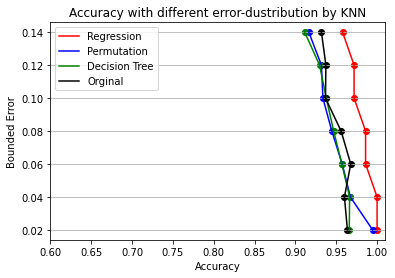

In [716]:
# x = [[1.0, 1.0, 0.9295774647887324, 0.8732394366197183, 0.8169014084507042],
# [1.0, 0.971830985915493, 0.9154929577464789, 0.9295774647887324, 0.9014084507042254],
# [1.0, 0.971830985915493, 0.9014084507042254, 0.8873239436619719, 0.8309859154929577],
# [0.9859154929577465, 0.9295774647887324, 0.8450704225352113, 0.7605633802816901, 0.8028169014084507]]
x = [BEAcclist_KNN_importanceReg,BEAcclist_KNN_importancePermu,BEAcclist_KNN_importanceDTree,BEAcclist_knn]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]
plt.xlim(0.6,1.01)
plt.title("Accuracy with different error-dustribution by KNN")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])

plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_KNN_iris.png')

plt.show()

In [570]:
a = [0,1,2,3,4,5,6]
b = [0,1,1,1,1,1,1]
ar1 = np.array(a)
ar2 = np.array(b)
print(np.sum(ar1!=b))

5


In [718]:
#ch4 generate accuracy of applying FI in data with 2% - 14% err
#kmeans,iris,importanceReg,Permu,DTree
import warnings
warnings.filterwarnings('ignore')
BEn = [0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_KM_importanceReg = []
BEAcclist_KM_importancePermu = []
BEAcclist_KM_importanceDTree = []
BEAcclist_km = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.5,random_state=j)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importanceReg.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKM Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0
    
for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importancePermu.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKM Accuracy (on testing) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importanceDTree.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKM Accuracy (on testing) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(BE=i)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=3,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_km.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train/31))
    print('BEKM Accuracy (on testing) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

BEKM Accuracy (on training) = with importanceReg bounded error 0.02 : 0.5092035720794607
BEKM Accuracy (on testing) = with importanceReg bounded error 0.02 : 0.9623051830373326
BEKM Accuracy (on training) = with importanceReg bounded error 0.04 : 0.4747585201385092
BEKM Accuracy (on testing) = with importanceReg bounded error 0.04 : 0.9623051830373326
BEKM Accuracy (on training) = with importanceReg bounded error 0.06 : 0.5930380900309824
BEKM Accuracy (on testing) = with importanceReg bounded error 0.06 : 0.9623051830373326
BEKM Accuracy (on training) = with importanceReg bounded error 0.08 : 0.5316201931838892
BEKM Accuracy (on testing) = with importanceReg bounded error 0.08 : 0.9623051830373326
BEKM Accuracy (on training) = with importanceReg bounded error 0.1 : 0.48860944049571714
BEKM Accuracy (on testing) = with importanceReg bounded error 0.1 : 0.9623051830373326
BEKM Accuracy (on training) = with importanceReg bounded error 0.12 : 0.5108438126480773
BEKM Accuracy (on testing) 

In [719]:
print(BEAcclist_KM_importanceReg)
print(BEAcclist_KM_importancePermu)
print(BEAcclist_KM_importanceDTree)
print(BEAcclist_km)

[0.9623051830373326, 0.9623051830373326, 0.9623051830373326, 0.9623051830373326, 0.9623051830373326, 0.9623051830373326, 0.9623051830373326]
[0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163]
[0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163]
[0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163, 0.9586976183298163]


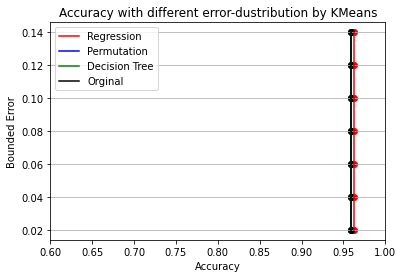

In [723]:
# x = [[0.7464788732394366, 0.7429577464788732, 0.7288732394366197, 0.7147887323943662, 0.7007042253521127],
# [0.7464788732394366, 0.7183098591549295, 0.6830985915492958, 0.6514084507042254, 0.6373239436619718],
# [0.7464788732394366, 0.7183098591549295, 0.6901408450704225, 0.6690140845070423, 0.6443661971830985],
# [0.7323943661971831, 0.7147887323943662, 0.6901408450704225, 0.6795774647887324, 0.6549295774647887]]
x = [BEAcclist_KM_importanceReg,BEAcclist_KM_importancePermu,BEAcclist_KM_importanceDTree,BEAcclist_km]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]
plt.xlim(0.6,1.0)
plt.title("Accuracy with different error-dustribution by KMeans")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])

plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_KM_iris.png')
plt.show()

ch4 Error distribution in $\alpha$ vs ACC \\\
暴力分派均線，四點特徵重要分派後的準確率

In [673]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_svm=[]
BE = 0.1
for i in range(21) :
    df_2feature_be = makeBEdata_4direc(importance=ratio[i])
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEACClist_bruteForce_svm.append(result_BE_test/31)
    print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train/31))
    print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.9777373920945027
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.999545661063153
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.9472966833257611
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.967741935483871
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.9472966833257611
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.967741935483871
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.9438891412994092
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.967741935483871
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 0.9541117673784647
BESVM Accu

In [674]:
print(BEACClist_bruteForce_svm)
print(importanceReg)

[0.999545661063153, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9541117673784647, 0.9541117673784647, 0.967741935483871, 0.9541117673784647, 0.9541117673784647, 0.967741935483871, 0.9541117673784647, 0.9541117673784647, 0.9541117673784647, 0.9541117673784647]
[0.7841327423165884, 0.2158672576834117]


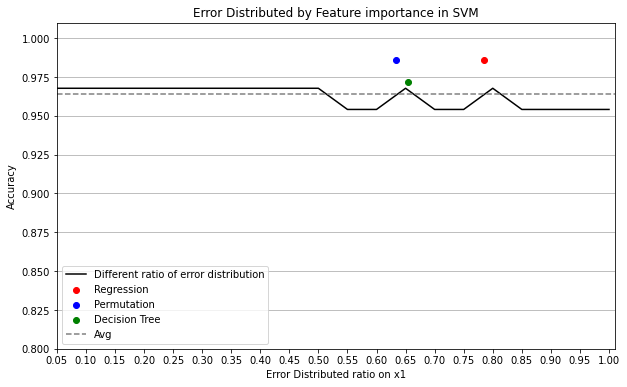

In [677]:
# svm,iris
# y = [0.964788732,0.964788732,0.954225352,0.947183099,
#      0.943661972,0.940140845,0.926056338,0.933098592,
#      0.929577465,0.929577465,0.922535211,0.926056338,
#      0.919014085,0.919014085,0.915492958,0.915492958,
#      0.915492958,0.911971831,0.911971831,0.908450704]
y = [BEACClist_bruteForce_svm]
x = [[0.0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]
# x_importance = [0.339,0.135,0.253]
# y_importance = [0.933098592,0.961267606,0.943661972]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_svm_importanceReg[4],BEAcclist_svm_importancePermu[4],BEAcclist_svm_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.05,1.01)
plt.ylim(0.8,1.01)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in SVM")
plt.ylabel("Accuracy")
plt.xlabel("Error Distributed ratio on x1")
#plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_SVM_vs_Avg_iris.png')
plt.legend()
plt.show()


0.957746479,0.947183099,0.950704225,0.947183099,0.940140845,0.940140845,0.940140845,0.943661972,0.929577465,0.933098592,0.919014085,0.936619718,0.929577465,0.919014085,0.926056338,0.929577465,0.936619718,0.92605633,0.936619718,0.940140845

In [713]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_knn=[]
BE = 0.1
for i in range(21) :
    df_2feature_be = makeBEdata_4direc(importance=ratio[i])
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEACClist_bruteForce_knn.append(result_BE_test/31)
    print('BEKNNN Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train/31))
    print('BEKNN Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

BEKNNN Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.9528623353021357
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.9536574284416175
BEKNNN Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.9554747841890051
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.9522944116310769
BEKNNN Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.9563834620626989
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.9527487505679241
BEKNNN Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.9568378009995454
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.9500227169468426
BEKNNN Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 0.9567242162653338
B

In [714]:
print(BEAcclist_KNN_importanceReg)

[1.0, 1.0, 0.9859154929577465, 0.9859154929577465, 0.971830985915493, 0.971830985915493, 0.9577464788732394]


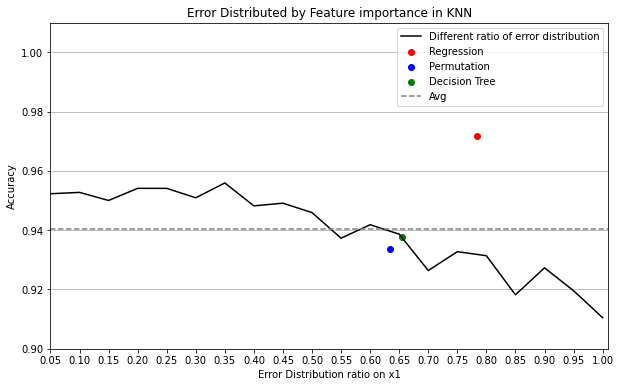

In [717]:
#knn,iris
# y = [0.957746479,0.947183099,0.950704225,0.947183099,
#      0.940140845,0.940140845,0.940140845,0.943661972,
#      0.929577465,0.933098592,0.919014085,0.936619718,
#      0.929577465,0.919014085,0.926056338,0.929577465,
#      0.936619718,0.92605633,0.936619718,0.940140845]
y = [BEACClist_bruteForce_knn]
x = [[0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]
#x_importance = [0.339,0.135,0.253]
#y_importance = [0.936619718,0.950704225,0.940140845]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_KNN_importanceReg[4],BEAcclist_KNN_importancePermu[4],BEAcclist_KNN_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.05,1.01)
plt.ylim(0.9,1.01)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in KNN")
plt.ylabel("Accuracy")
plt.xlabel("Error Distribution ratio on x1")
#plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_KNN_iris_vs_Avg.png')
plt.legend()
plt.show()

0.746478873,0.73943662,0.742957746,0.742957746,0.735915493,0.732394366,0.697183099,0.728873239,0.711267606,0.714788732,0.711267606,0.711267606,0.707746479,0.700704225,0.690140845,0.686619718,0.683098592,0.686619718,0.683098592,0.679577465


In [721]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_km=[]
BE = 0.1
for i in range(21) :
    df_iris_2feature_be = makeBEdata_4direc(importance=ratio[i])
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEACClist_bruteForce_km.append(result_BE_test/31)
    print('BKM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train))
    print('BKM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

BKM Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 15.616935483870968
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 29.719626168224305
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 16.967741935483872
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 29.719626168224305
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 15.024193548387098
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 29.719626168224305
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 17.51209677419355
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 29.719626168224305
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 12.90322580645161
BKM Accuracy (on testing) 

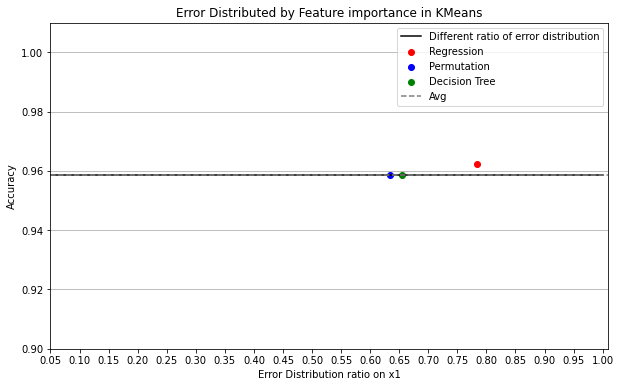

In [725]:
#kmeans ,iris
# y = [0.746478873,0.73943662,0.742957746,0.742957746,
#      0.735915493,0.732394366,0.697183099,0.728873239,
#      0.711267606,0.714788732,0.711267606,0.711267606,
#      0.707746479,0.700704225,0.690140845,0.686619718,
#      0.683098592,0.686619718,0.683098592,0.679577465]
y = [BEACClist_bruteForce_km]
x = [[0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]

# x_importance = [0.339,0.135,0.253]
# y_importance = [0.728873239,0.742957746,0.732394366]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_KM_importanceReg[4],BEAcclist_KM_importancePermu[4],BEAcclist_KM_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.05,1.01)
plt.ylim(0.9,1.01)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in KMeans")
plt.ylabel("Accuracy")
plt.xlabel("Error Distribution ratio on x1")
plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_KMeans_iris_vs_Avg.png')
plt.legend()
plt.show()




IOT dataset is used from here

In [581]:
# #RegCoef =[2.910980313625912, 0.256307040639797]
# importanceReg = [0.9175816812106525, 0.08241831878934744]
# #PermuCoef : [0.3004377431906615, 0.05671206225680936]
# importancePermu = [0.8358475041140976, 0.16415249588590236]
# #DTreeCoef : [0.9584749355112676, 0.04152506448873233]
# importanceDTree = [0.9587580450008334, 0.04124195499916664]
#RegCoef : [0.0017731041814707073, 0.0002743642318678488]
# importanceReg = [0.8659983079199367, 0.1340016920800632]
# #PermuCoef : [0.2997081712062257, 0.0570525291828794]
# importancePermu = [0.840081799591002, 0.15991820040899798]
# #DTreeCoef : [0.9586334768254244, 0.04136652317457554]
# importanceDTree = [0.9586334768254244, 0.04136652317457554]

In [582]:
#pick light,co2,y
from sklearn import preprocessing
#dataset_light_co2 = dataset.iloc[1:,3:5]#light,co2
dataset_light_co2 = dataset.loc[1:,['x2','x6']]#Temperature,humidityRatio
dataset_light_co2['y'] = dataset.iloc[1:,6:7]
dataset_light_co2.columns = ['x1','x2','y']
dataset_light_co2['x1'] = dataset_light_co2['x1'].apply(lambda x : float(x))
dataset_light_co2['x2'] = dataset_light_co2['x2'].apply(lambda x : float(x))
dataset_light_co2['y'] = dataset_light_co2['y'].apply(lambda x : int(x))

minmax = preprocessing.MinMaxScaler()
dataset_light_co2 = minmax.fit_transform(dataset_light_co2)
dataset_light_co2 = pd.DataFrame(dataset_light_co2)
dataset_light_co2.columns = ['x1','x2','y']
subset = dataset_light_co2.sample(frac=0.01,replace=False,random_state=43)
subset_x = subset.iloc[:,:-1]
subset_y = subset.iloc[:,-1]
dataset_light_co2

,x1,x2,y
0,0.869029,0.549737,1.0
1,0.872357,0.551972,1.0
2,0.874576,0.549997,1.0
3,0.873190,0.544374,1.0
4,0.879014,0.550376,1.0
...,...,...,...
20555,0.335593,0.404757,1.0
20556,0.344838,0.409306,1.0
20557,0.349461,0.411030,1.0
20558,0.349461,0.422253,1.0


In [583]:
subset_x

,x1,x2
8854,0.072111,0.280171
11864,0.295840,0.161152
2995,0.406780,0.340106
3351,0.349461,0.243580
5908,0.164561,0.004395
...,...,...
15001,0.257011,0.661843
14326,0.155316,0.638206
18082,0.534361,0.546546
2207,0.314330,0.279978


In [584]:
importanceMeasure_x = dataset_light_co2.iloc[:,:-1]
importanceMeasure_y = dataset_light_co2.iloc[:,-1]
importanceReg,RegCoef = featureImportance_linearRegression(importanceMeasure_x,importanceMeasure_y)
model = KNeighborsClassifier(n_neighbors=2,algorithm="brute")  ## k = 5
model.fit(subset_x,subset_y)  
# model = KMeans(n_clusters=2,init='random')
# model.fit(subset_x,subset_y)
importancePermu,PermuCoef = featureImportance_permutation(model,subset_x,subset_y)
importanceDTree,DTreeCoef = featureImportance_DTree(subset_x,subset_y)
print("RegCoef : " +str(RegCoef))
print("importanceReg : "+str(importanceReg))
print("PermuCoef : "+str(PermuCoef))
print("importancePermu : "+str(importancePermu))
print("DTreeCoef : " +str(DTreeCoef))
print("importanceDTree : "+str(importanceDTree))

RegCoef : [1.1338701329919216, 0.3121479603759092]
importanceReg : [0.7841327423165884, 0.2158672576834117]
PermuCoef : [0.19029126213592235, 0.10970873786407773]
importancePermu : [0.634304207119741, 0.36569579288025905]
DTreeCoef : [0.6548773684718445, 0.34512263152815537]
importanceDTree : [0.6548773684718446, 0.3451226315281554]


In [585]:
#ch4 generate accuracy of applying FI in data with 2% - 14% err
#svm,IOT,importanceReg,Permu,DTree
BEn = [0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_svm_importanceReg = []
BEAcclist_svm_importancePermu = []
BEAcclist_svm_importanceDTree = []
BEAcclist_svm = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    #for j in range(30):
    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
    clf_BE = SVC(kernel='linear',C=1,gamma='auto')
    clf_BE.fit(X_train, y_train)
    y_BE_predict = clf_BE.predict(X_test)
    result_BE_train = clf_BE.score(X_train, y_train)
    result_BE_test = clf_BE.score(X_test, y_test)
    BEAcclist_svm_importanceReg.append(result_BE_test)
    print('BESVM Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test))
    #result_BE_train = 0
    #result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEAcclist_svm_importancePermu.append(result_BE_test/31)
    print('BESVM Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with  importancePermu bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEAcclist_svm_importanceDTree.append(result_BE_test/31)
    print('BESVM Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with  importanceDTree bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i)#0.5:0.5
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEAcclist_svm.append(result_BE_test/31)
    print('BESVM Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with  1:1 bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0


BESVM Accuracy (on training) = with importanceReg bounded error 0.02 : 0.8360165369649806
BESVM Accuracy (on testing) = with importanceReg bounded error 0.02 : 0.8391536964980545
BESVM Accuracy (on training) = with importanceReg bounded error 0.04 : 0.8366609922178988
BESVM Accuracy (on testing) = with importanceReg bounded error 0.04 : 0.8360408560311284
BESVM Accuracy (on training) = with importanceReg bounded error 0.06 : 0.8357976653696498
BESVM Accuracy (on testing) = with importanceReg bounded error 0.06 : 0.8388618677042802
BESVM Accuracy (on training) = with importanceReg bounded error 0.08 : 0.8360651750972763
BESVM Accuracy (on testing) = with importanceReg bounded error 0.08 : 0.8394941634241245
BESVM Accuracy (on training) = with importanceReg bounded error 0.1 : 0.8354936770428015
BESVM Accuracy (on testing) = with importanceReg bounded error 0.1 : 0.8384727626459144
BESVM Accuracy (on training) = with importanceReg bounded error 0.12 : 0.8362110894941635
BESVM Accuracy (o

In [586]:
print(BEAcclist_svm_importanceReg)
print(BEAcclist_svm_importancePermu)
print(BEAcclist_svm_importanceDTree)
print(BEAcclist_svm)

[0.8391536964980545, 0.8360408560311284, 0.8388618677042802, 0.8394941634241245, 0.8384727626459144, 0.8355544747081712, 0.8322470817120623]
[0.836144408183758, 0.8097746956194303, 0.8088756746579641, 0.80892431279026, 0.8096554537467051, 0.8077664114472198, 0.8088929333500692]
[0.8092726245763775, 0.8095738672022091, 0.8094860047696748, 0.8090874858792522, 0.8091094514873854, 0.808709363624953, 0.809244383080206]
[0.8089776578385843, 0.8093777457010167, 0.8092726245763775, 0.8095001255177608, 0.8091957449479101, 0.8098107819756497, 0.8086513116606]


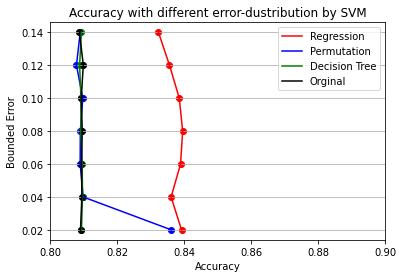

In [587]:
#IOT
# x = [[0.9888740272373541, 0.9882782101167316, 0.987852626459144, 0.9867947470817121, 0.9848735408560312],
#      [0.9888740272373541, 0.9883268482490273, 0.9878891050583658, 0.9871352140077821, 0.9854450389105058],
#      [0.9888740272373541, 0.9882417315175097, 0.9878039883268482, 0.9863934824902724, 0.9846911478599222],
#      [1.0, 0.9577464788732394, 0.8450704225352113, 0.8309859154929577, 0.7887323943661971]]
x = [BEAcclist_svm_importanceReg,BEAcclist_svm_importancePermu,BEAcclist_svm_importanceDTree,BEAcclist_svm]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]

plt.xlim(0.8,0.9)
plt.title("Accuracy with different error-dustribution by SVM")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])
plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_SVM_iot.png')
plt.show()

In [588]:
#ch4 generate accuracy of applying FI in data with 5% - 20% err
#knn,IOT,importanceReg,Permu,DTree
BEn = [0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_KNN_importanceReg = []
BEAcclist_KNN_importancePermu = []
BEAcclist_KNN_importanceDTree = []
BEAcclist_knn = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
    KNN_BE = KNeighborsClassifier()
    KNN_BE.fit(X_train, y_train)
    y_BE_predict = KNN_BE.predict(X_test)
    result_BE_train = KNN_BE.score(X_train, y_train)
    result_BE_test = KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importanceReg.append(result_BE_test)
    print('BEKNN Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test))

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importancePermu.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_KNN_importanceDTree.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i)#1:1
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEAcclist_knn.append(result_BE_test/31)
    result_BE_test = 0
    result_BE_train = 0
    print('BEKNN Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKNN Accuracy (on testing) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_test))



BEKNN Accuracy (on training) = with importanceReg bounded error 0.02 : 0.9610530155642023
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.02 : 0.9453793774319066
BEKNN Accuracy (on training) = with importanceReg bounded error 0.04 : 0.9552893968871595
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.04 : 0.9373054474708171
BEKNN Accuracy (on training) = with importanceReg bounded error 0.06 : 0.9505350194552529
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.06 : 0.931955252918288
BEKNN Accuracy (on training) = with importanceReg bounded error 0.08 : 0.9475194552529183
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.08 : 0.9292315175097277
BEKNN Accuracy (on training) = with importanceReg bounded error 0.1 : 0.9448808365758755
BEKNN Accuracy (on testing) = with importanceReg bounded error 0.1 : 0.9239785992217899
BEKNN Accuracy (on training) = with importanceReg bounded error 0.12 : 0.9446984435797665
BEKNN Accuracy (on

In [589]:
print(BEAcclist_KNN_importanceReg)
print(BEAcclist_KNN_importancePermu)
print(BEAcclist_KNN_importanceDTree)
print(BEAcclist_knn)

[0.9453793774319066, 0.9373054474708171, 0.931955252918288, 0.9292315175097277, 0.9239785992217899, 0.9220330739299611, 0.9206225680933852]
[0.945203652566838, 0.9073427890046442, 0.9025856658717208, 0.8979368018074558, 0.8967035898079578, 0.8940692858039411, 0.8935483870967742]
[0.9162263085226561, 0.9076032383582275, 0.9031457888791263, 0.8978128530187023, 0.8968008660725494, 0.8945242876867076, 0.8935734906489269]
[0.9153586670013807, 0.9058836450357727, 0.9014073678925567, 0.8980795782603238, 0.8930070917534829, 0.8927984184762144, 0.8937994226183004]


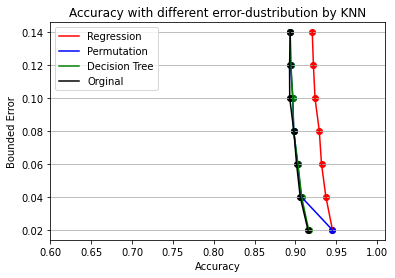

In [590]:
# x = [[0.9995622568093385, 0.9925583657587549, 0.9915856031128405, 0.9915612840466926, 0.9910384241245136],
#      [0.9995622568093385, 0.9925583657587549, 0.9915369649805448, 0.9916099221789884, 0.9910749027237354],
#      [0.9995622568093385, 0.9928380350194552, 0.9917558365758755, 0.9914640077821012, 0.9910384241245136],
#      [0.9859154929577465, 0.9295774647887324, 0.8450704225352113, 0.7605633802816901, 0.8028169014084507]]
#y = [[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4]]
x = [BEAcclist_KNN_importanceReg,BEAcclist_KNN_importancePermu,BEAcclist_KNN_importanceDTree,BEAcclist_knn]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]
plt.xlim(0.6,1.01)
plt.title("Accuracy with different error-dustribution by KNN")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])

plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_KNN_iot.png')

plt.show()

In [591]:
#ch4 generate accuracy of applying FI in data with 5%-20% err
#kmeans,iot,importanceReg,Permu,DTree
BEn =[0.02,0.04,0.06,0.08,0.1,0.12,0.14]
BEAcclist_KM_importanceReg = []
BEAcclist_KM_importancePermu = []
BEAcclist_KM_importanceDTree = []
BEAcclist_km = []

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceReg)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importanceReg.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKM Accuracy (on testing) = with importanceReg bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0
    
for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importancePermu)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values

    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importancePermu.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKM Accuracy (on testing) = with importancePermu bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i,importance=importanceDTree)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_KM_importanceDTree.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKM Accuracy (on testing) = with importanceDTree bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

for i in BEn :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,BE=i)
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=3,init='random')
        KM_BE.fit(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEAcclist_km.append(result_BE_test/31)
    print('BEKM Accuracy (on training) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_train))
    print('BEKM Accuracy (on testing) = with 1:1 bounded error '+str(i)+' : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

BEKM Accuracy (on training) = with importanceReg bounded error 0.02 : 14.728821567537521
BEKM Accuracy (on testing) = with importanceReg bounded error 0.02 : 29.999027237354095
BEKM Accuracy (on training) = with importanceReg bounded error 0.04 : 15.5230683713174
BEKM Accuracy (on testing) = with importanceReg bounded error 0.04 : 29.999027237354095
BEKM Accuracy (on training) = with importanceReg bounded error 0.06 : 13.949346859366315
BEKM Accuracy (on testing) = with importanceReg bounded error 0.06 : 29.999027237354095
BEKM Accuracy (on training) = with importanceReg bounded error 0.08 : 14.997693162868261
BEKM Accuracy (on testing) = with importanceReg bounded error 0.08 : 29.999027237354095
BEKM Accuracy (on training) = with importanceReg bounded error 0.1 : 14.73050305725403
BEKM Accuracy (on testing) = with importanceReg bounded error 0.1 : 29.999027237354095
BEKM Accuracy (on training) = with importanceReg bounded error 0.12 : 15.00404391328516
BEKM Accuracy (on testing) = wit

In [592]:
print(BEAcclist_KM_importanceReg)
print(BEAcclist_KM_importancePermu)
print(BEAcclist_KM_importanceDTree)
print(BEAcclist_km)

[0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805]
[0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805]
[0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805]
[0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805, 0.9677105560436805]


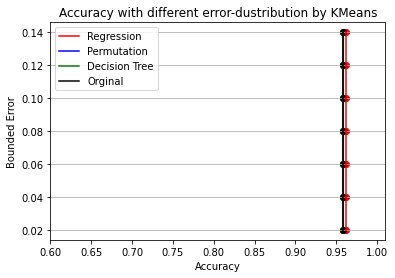

In [726]:
# x = [[0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043],
#      [0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043],
#      [0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043],
#      [0.7323943661971831, 0.7147887323943662, 0.6901408450704225, 0.6795774647887324, 0.6549295774647887]]
# x = [[0.10718628404669261, 0.8931177042801557, 0.8929596303501945, 0.8931785019455253, 0.8928745136186771],
#      [0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043, 0.9999513618677043],
#      [0.10718628404669261, 0.8928623540856031, 0.8927042801556421, 0.8934460116731517, 0.1062864785992218],
#      [0.7323943661971831, 0.7147887323943662, 0.6901408450704225, 0.6795774647887324, 0.6549295774647887]]
#y = [[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4],[0,0.1,0.2,0.3,0.4]]
x = [BEAcclist_KM_importanceReg,BEAcclist_KM_importancePermu,BEAcclist_KM_importanceDTree,BEAcclist_km]
y = [[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0.02,0.04,0.06,0.08,0.1,0.12,0.14]]
plt.xlim(0.6,1.01)
plt.title("Accuracy with different error-dustribution by KMeans")
plt.xlabel("Accuracy")
plt.ylabel("Bounded Error")
color = ['red','blue','green','black']
label = ['Regression','Permutation','Decision Tree','Orginal']
# 設置y軸刻度
y_ticks = [0, 0.1, 0.2, 0.3, 0.4]

for i in range(len(x)):
    plt.scatter(x[i],y[i],color=color[i])
    plt.plot(x[i],y[i],color=color[i],label=label[i])

plt.grid(axis='y')
plt.legend()
#plt.savefig('D:\BESVM\BESVM\experimentpng\FourError-distribution_KM_iot.png')
plt.show()

ch4 Error distribution in $\alpha$ vs ACC \\\
隨機分派均線，四點特徵重要分派後的準確率 \\\
iot

0.97361995,0.97306497,0.974100932,0.970142075,0.971881012,0.969106112,0.96999408,0.969328104,0.969143111,0.970771052,0.970142075,0.969032115,0.965480243,0.968625129,0.967034187,0.966923191,0.965221252,0.966553204,0.963112328,0.962964333
Acg = 0.968811973


In [594]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_svm=[]
BE = 0.1
for i in range(21) :
    df_2feature_be = makeBEdata_4direc(X=dataset_light_co2,importance=ratio[i])
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        clf_BE = SVC(kernel='linear',C=1,gamma='auto')
        clf_BE.fit(X_train, y_train)
        y_BE_predict = clf_BE.predict(X_test)
        result_BE_train += clf_BE.score(X_train, y_train)
        result_BE_test += clf_BE.score(X_test, y_test)
    BEACClist_bruteForce_svm.append(result_BE_test/31)
    print('BESVM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train))
    print('BESVM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 25.0861016536965
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 25.098686770428017
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 25.090710116731522
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 25.086332684824903
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 25.091536964980545
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 25.085408560311283
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 25.09806663424124
BESVM Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 25.091196498054472
BESVM Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 25.102553501945525
BESVM Acc

In [595]:
print(BEACClist_bruteForce_svm)
print(importanceReg)
print(BEAcclist_svm_importanceReg[4])
print(BEAcclist_svm_importancePermu[4])

[0.8096350571105811, 0.8092365382201582, 0.8092067277519769, 0.809393435421112, 0.809506401405799, 0.8094201079452743, 0.8096146604744573, 0.8089729509225556, 0.8096915401029244, 0.8091314170955191, 0.8081916028618049, 0.8090921927952804, 0.8083171206225681, 0.8090262959708799, 0.8089603991464792, 0.8094734529935985, 0.8084661729634744, 0.808998054474708, 0.8086528806326095, 0.8091220032634617, 0.8092914522404924]
[0.7841327423165884, 0.2158672576834117]
0.8384727626459144
0.8096554537467051


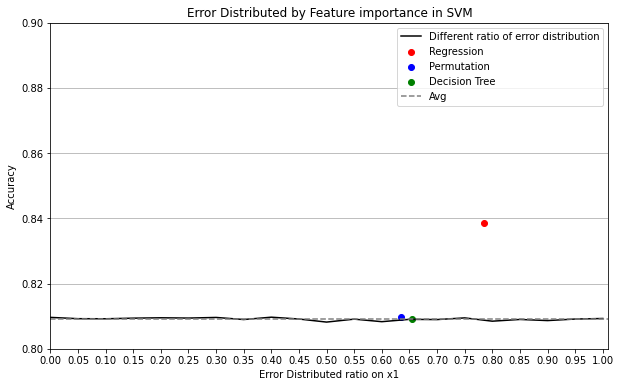

In [596]:
# svm,IOT
# y = [0.97361995,0.97306497,0.974100932,0.970142075,
#      0.971881012,0.969106112,0.96999408,0.969328104,
#      0.969143111,0.970771052,0.970142075,0.969032115,
#      0.965480243,0.968625129,0.967034187,0.966923191,
#      0.965221252,0.966553204,0.963112328,0.962964333]
y = [BEACClist_bruteForce_svm]
x = [[0.0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]
# x_importance = [0.08,0.169,0.383]
# y_importance = [0.987840467,0.987840467,0.987840467]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_svm_importanceReg[4],BEAcclist_svm_importancePermu[4],BEAcclist_svm_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.0,1.01)
plt.ylim(0.8,0.9)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in SVM")
plt.ylabel("Accuracy")
plt.xlabel("Error Distributed ratio on x1")
#plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_SVM_vs_Avg_iot.png')
plt.legend()
plt.show()


ps watch out the accuracy should be matched \\\
0.981241675,0.979391742,0.9778747970.977541808,0.976875832,0.97694983,0.977097824,0.976801835,0.976542844,0.976209856,0.97665384,0.976801835,0.97583987,0.976579843,0.975913867,0.97639485,0.976468847,0.976468847,0.977615806,0.982869617
Avg:0.977406763


In [607]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_knn=[]
BE = 0.1
for i in range(21) :
    df_2feature_be = makeBEdata_4direc(X=dataset_light_co2,importance=ratio[i])
    x_be = df_2feature_be.iloc[:, :-1].values
    y_be = df_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2)
        KNN_BE = KNeighborsClassifier()
        KNN_BE.fit(X_train, y_train)
        y_BE_predict = KNN_BE.predict(X_test)
        result_BE_train += KNN_BE.score(X_train, y_train)
        result_BE_test += KNN_BE.score(X_test, y_test)
    BEACClist_bruteForce_knn.append(result_BE_test/31)
    print('BEKNN Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train/31))
    print('BEKNN Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test/31))
    result_BE_train = 0
    result_BE_test = 0

BEKNN Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.9240507719342287
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 0.9000219656081335
BEKNN Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.9182377306388854
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 0.8991260825906865
BEKNN Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.9179133456759132
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 0.8995497050332624
BEKNN Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.9161906144094389
BEKNN Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 0.8975665244132044
BEKNN Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 0.9150342820384084
BEKNN 

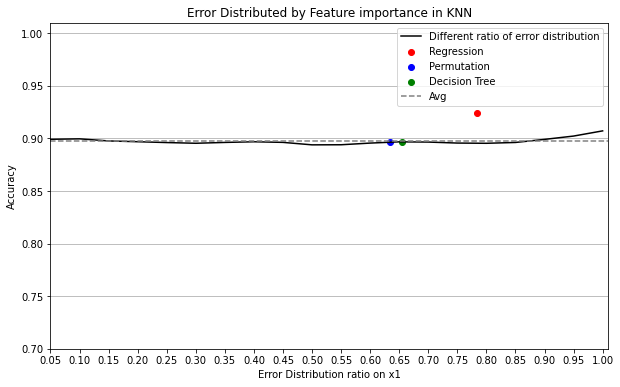

In [608]:
#knn,iot
# y = [0.981241675,0.979391742,0.977874797,0.977541808,
#      0.976875832,0.97694983,0.977097824,0.976801835,
#      0.976542844,0.976209856,0.97665384,0.976801835,
#      0.97583987,0.976579843,0.975913867,0.97639485,
#      0.976468847,0.976468847,0.977615806,0.982869617]
# x = [0.05,0.1,0.15,0.2,
#      0.25,0.3,0.35,0.4,
#      0.45,0.5,0.55,0.6,
#      0.65,0.7,0.75,0.8,
#      0.85,0.9,0.95,1.0]
y = [BEACClist_bruteForce_knn]
x = [[0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]
# x_importance = [0.08,0.169,0.383]
# y_importance = [0.988326848,0.988326848,0.98881323]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_KNN_importanceReg[4],BEAcclist_KNN_importancePermu[4],BEAcclist_KNN_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.05,1.01)
plt.ylim(0.7,1.01)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in KNN")
plt.ylabel("Accuracy")
plt.xlabel("Error Distribution ratio on x1")
#plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_KNN_iot_vs_Avg.png')
plt.legend()
plt.show()

0.037479651,0.963038331,0.036628681,0.963741305,0.036036703,0.03555572,0.965110256,0.035925707,0.964962261,0.035999704,0.035925707,0.036036703,0.036517685,0.036961669,0.038071629,0.040328548,0.040328548,0.958450496,0.957081545,0.04417641
Avg : 0.314917863

0.962927335,0.963445316


In [599]:
ratio = [[0.0,1.0],[0.05,0.95],[0.1,0.9],[0.15,0.85],
         [0.2,0.8],[0.25,0.75],[0.3,0.7],[0.35,0.65],
         [0.4,0.6],[0.45,0.55],[0.5,0.5],[0.55,0.45],
         [0.6,0.4],[0.65,0.35],[0.7,0.3],[0.75,0.25],
         [0.8,0.2],[0.85,0.15],[0.9,0.1],[0.95,0.05],[1.0,0.0]]
BEACClist_bruteForce_km=[]
BE = 0.1
for i in range(21) :
    df_iris_2feature_be = makeBEdata_4direc(X=dataset_light_co2,importance=ratio[i])
    x_be = df_iris_2feature_be.iloc[:, :-1].values
    y_be = df_iris_2feature_be.iloc[:,-1].values
    for j in range(30):
        X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.3)
        KM_BE=KMeans(n_clusters=2,init='random')
        KM_BE.fit(X_train)
        y_BE_predict = KM_BE.predict(X_train)
        y_BE_predict_test = KM_BE.predict(X_test)
        result_BE_train += 1 - np.sum(y_BE_predict!=y_train)/len(y_train)
        result_BE_test += 1 - np.sum(y_BE_predict_test!=y_train)/len(y_test)
    BEACClist_bruteForce_km.append(result_BE_test/31)
    print('BKM Accuracy (on training) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_train))
    print('BKM Accuracy (on testing) = with x1 bounded error ('+str(BE)+'%*'+str(ratio[i][0])+'),x2 with error ('+str(BE)+'%*'+str(ratio[i][1])+') : '+str(result_BE_test))
    result_BE_train = 0
    result_BE_test = 0

BKM Accuracy (on training) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 610.8293617982216
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.0),x2 with error (0.1%*1.0) : 614.2165856031125
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 14.998957754307948
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.05),x2 with error (0.1%*0.95) : 29.999027237354095
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 14.982490272373543
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.1),x2 with error (0.1%*0.9) : 29.999027237354095
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 15.80760144524736
BKM Accuracy (on testing) = with x1 bounded error (0.1%*0.15),x2 with error (0.1%*0.85) : 29.999027237354095
BKM Accuracy (on training) = with x1 bounded error (0.1%*0.2),x2 with error (0.1%*0.8) : 14.169899944413565
BKM Accuracy (on testing) =

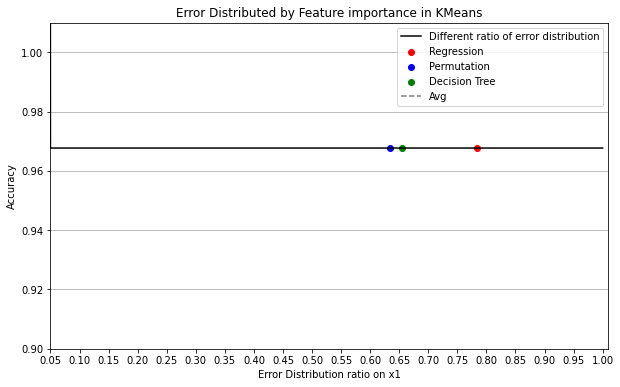

In [600]:
#kmeans ,iot
# y = [0.037479651,0.963038331,0.036628681,0.963741305,
#      0.036036703,0.03555572,0.965110256,0.035925707,
#      0.964962261,0.035999704,0.035925707,0.036036703,
#      0.036517685,0.036961669,0.038071629,0.040328548,
#      0.040328548,0.958450496,0.957081545,0.04417641]
# x = [0.05,0.1,0.15,0.2,
#      0.25,0.3,0.35,0.4,
#      0.45,0.5,0.55,0.6,
#      0.65,0.7,0.75,0.8,
#      0.85,0.9,0.95,1.0]

y = [BEACClist_bruteForce_km]
x = [[0,0.05,0.1,0.15,0.2,
     0.25,0.3,0.35,0.4,
     0.45,0.5,0.55,0.6,
     0.65,0.7,0.75,0.8,
     0.85,0.9,0.95,1.0]]
# x_importance = [0.08,0.169,0.383]
# #y_importance = [0.962927335,0.963445316,0.3]
# y_importance = [0.9999513618677043,0.9999513618677043,0.9999513618677043]
x_importance = [importanceReg[0],importancePermu[0],importanceDTree[0]]
y_importance = [BEAcclist_KM_importanceReg[4],BEAcclist_KM_importancePermu[4],BEAcclist_KM_importanceDTree[4]]
avg = np.mean(y)
fig = plt.figure(figsize=(10,6))
x_major_locator=MultipleLocator(0.05)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(0.05,1.01)
plt.ylim(0.9,1.01)
plt.grid(axis='y')
plt.plot(x[0],y[0],color='black',label="Different ratio of error distribution")
plt.scatter(x_importance[0],y_importance[0],color=color[0],label="Regression")
plt.scatter(x_importance[1],y_importance[1],color=color[1],label='Permutation')
plt.scatter(x_importance[2],y_importance[2],color=color[2],label="Decision Tree")
plt.axhline(y=avg,color="gray",linestyle = '--',label="Avg")
plt.title("Error Distributed by Feature importance in KMeans")
plt.ylabel("Accuracy")
plt.xlabel("Error Distribution ratio on x1")
#plt.savefig('D:\BESVM\BESVM\experimentpng\ErrorDistributedFI_KMeans_iot_vs_Avg.png')
plt.legend()
plt.show()




check the accuracy in iot data $\\$
should be matched in 0.5:0.5 distribution and brute force distributed inder 20%